<h1 style="text-align: center;">Body Mass Index (BMI) Exploration using Python</h1>


* Student Name: Michael Rideout
* Student Number: 225065259
* E-mail: s225065259@deakin.edu.au
* Student Course Code: SIT731
---

## Introduction

Body Mass Index (BMI) is a universally recognised value based on a person's mass (weight) and height. It was developed in 1832 by a Belgian mathematician name Lambert Adolphe Jacques Quetelet. He developed the measure as a means to quickly determine an individual's ideal weight based on their height [1].

This investigation will explore the calculation and display of BMI and New BMI values in python and the advantages and disadvantages of these metrics.

## Traditional BMI

The traditional definition of BMI is the body mass of an individual divided by the square of the body height and is expressed in units of kg/m². 
Expressed mathematically it is:
$$ BMI = \frac{mass_{kg}}{height_m^2}$$ 
It is useful as a general rule to determine the ratio of a person's tissue mass (muscle, fat and bone) and height [2]. 


In [36]:
def calculate_traditional_bmi(height, weight):
    """
    Calculates traditional BMI from height and weight.
    height in centimeters,
    weight in meters
    """
    return weight / ((height / 100)**2)

## BMI Categories

BMI values have been categorised to the following weight bands to provide a convenient measure of weight health:


| **Category** 	|   **BMI**   	|
|:------------:	|:-----------:	|
|  Underweight 	|    < 18.5   	|
| Normal Range 	| 18.5 - 24.9 	|
|  Overweight  	| 25.0 - 29.9 	|
|     Obese    	|    ≥ 30.0   	|



In [37]:
bmi_category_to_colour = {
    "Underweight": "yellow",
    "Normal": "green",
    "Overweight": "red",
    "Obese": "purple"
}
def determine_bmi_category(bmi):
    """
    Determines BMI category
    bmi is the BMI value
    returns a BMI category string
    """
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 25:
        return "Normal"
    elif 25 <= bmi < 30:
        return "Overweight"
    else:
        return "Obese"

## New BMI
Nick Trefethen revised the traditional BMI formula [3] as a way to mitigate distortions for individuals at the extreme ends of the height spectrum that were being distorted by the use of an exponent of 2. This new formula is called New BMI. The new formula expressed mathematically is:
$$ New\ BMI  =  (\frac{mass_{kg}}{height_m^2}) \times 1.3 $$

In [38]:
def calculate_new_bmi(height, weight):
    """
    Calculates new BMI from height and weight.
    height in centimeters,
    weight in meters"""
    return 1.3 * (weight / ((height / 100) ** 2.5))

## Graph of Test Data

Below test data for a handful of ficitious individuals has been created. The features per individual are name, height, weight, traditional BMI and New BMI.
BMI and New BMI data is then plotted on a bar graph for the individuals.

In [39]:
# Test data
names = ['Luke', "Rei", "Jose", "Marcela", "Sven", "Katrina"]
heights = [190, 175, 160, 165, 176, 175]
weights = [67, 70, 76, 60, 55, 100]
traditional_bmis = [calculate_traditional_bmi(h, w) for h, w in zip(heights, weights)]
new_bmis = [calculate_new_bmi(h, w) for h, w in zip(heights, weights)]
traditional_bmi_categories = [determine_bmi_category(bmi) for bmi in traditional_bmis]
traditional_bmi_colours = [bmi_category_to_colour[category] for category in traditional_bmi_categories]
new_bmi_categories = [determine_bmi_category(bmi) for bmi in new_bmis]
new_bmi_colours = [bmi_category_to_colour[category] for category in new_bmi_categories]
# Lengths for display alignment
max_name_length = max(len(name) for name in names)
max_category_length = max(len(category) for category in new_bmi_categories)

# Print the bmi calculations for each person
for name, height, weight, bmi, new_bmi, category, colour in zip(names, heights, weights, traditional_bmis, new_bmis, traditional_bmi_categories, traditional_bmi_colours):
    print (f"{name:<{max_name_length}} has a BMI of {bmi:.2f} which is {category:<{max_category_length}} The new BMI index is {new_bmi:.2f}.")

Luke    has a BMI of 18.56 which is Normal      The new BMI index is 17.50.
Rei     has a BMI of 22.86 which is Normal      The new BMI index is 22.46.
Jose    has a BMI of 29.69 which is Overweight  The new BMI index is 30.51.
Marcela has a BMI of 22.04 which is Normal      The new BMI index is 22.30.
Sven    has a BMI of 17.76 which is Underweight The new BMI index is 17.40.
Katrina has a BMI of 32.65 which is Obese       The new BMI index is 32.09.


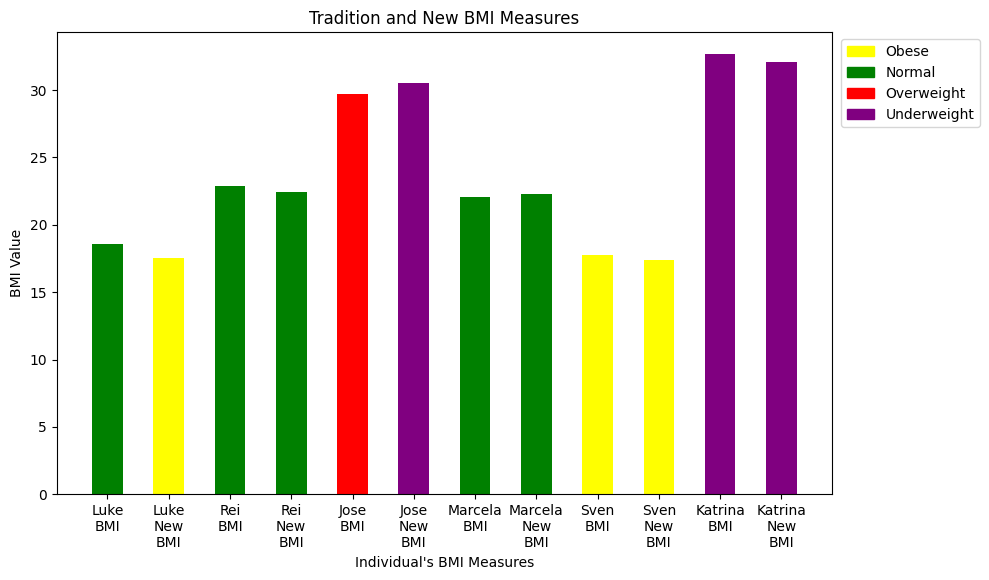

In [40]:
# Plot of bar graph for BMI and New BMI
import matplotlib.pyplot as plt

fix, ax = plt.subplots(figsize=(10, 6))

# Plot the data
ax.bar([i for i in range(0, len(names) * 2, 2)], traditional_bmis, color=traditional_bmi_colours, width=0.5)
ax.bar([i for i in range(1, (len(names) * 2) + 1, 2)], new_bmis, color=new_bmi_colours, width=0.5)

# Set x-axis ticks and labels
ax.set_xticks(range(len(names) * 2))
# Interleave BMI and New BMI labels
labels = []
for name in names:
    labels.extend([f"{name}\nBMI", f"{name}\nNew\nBMI"])
ax.set_xticklabels(labels)

# Add labels and title 
ax.set_xlabel("Individual's BMI Measures")
ax.set_ylabel("BMI Value")
ax.set_title("Tradition and New BMI Measures")

# Display the legend
ax.legend(handles=[plt.Rectangle((0,0), 1, 1, color=colour) for colour in bmi_category_to_colour.values()],
          labels=set(bmi_category_to_colour.keys()), loc='upper right', bbox_to_anchor=(1.2, 1.0))

# Show the plot 
plt.show()


## BMI Measure Commentary

Traditional BMI is a simple measure that given the height and weight of a person, it can catagorise their weight into weight bands that allows the populace, and medical professionals, to easily understand if their weight is at a healthy level or not for their height. Since its creation in 1832 by Adolphe Jacques Quetelet [1] it has been a useful tool for determining if individuals are leading a sedentary life and if they are overweight [4]. One of the biggest advantages of the BMI measure has been to show a correlation between an individual's BMI and various health outcomes. Some examples of such correlations include:
* An individual with a BMI greater than 30.0 has a marked increase in the risk of chronic health issues such as heart disease, cancer and all-cause mortality [6].
* Individuals who were in the "underweight" BMI category died an average of 6.7 years earlier than those in the "normal" category. Individuals in the "severely obese" or "extremely obese" died an average of 3.7 years earlier than people with a "normal" BMI [7].


The simplicity of traidtional BMI measure, whilst useful for ease of cacluation, has been shown to be dificient for certain segments of the population. Some criticisms for tradition BMI have been:

* As one input into the traditional BMI measure is weight, the ratio between muscle and fat as a constituent of weight can vary dramatically between individuals. Health outcomes for lean, low fat individuals is different for that of individuals who have a high fat body percentage. Lean individuals can be misclassified by the traditional BMI measure [8].
* One universal definition of BMI category bands cannot be applied cart blanche across differing racial and ethnic groups. For various genetic or cultural reasons certain populations require specific re-categorisation of BMI weight bands. "Asian populations have different associations between BMI, percentage of body fat, and health risks than do European populations" [9].

## Conclusion

Since it's inception, the BMI measure has become a universally recognised, standard method of utilising a persons height and weight to measure their weight health category. It has given health professional an easy to understand tool they can use to educate their patients about how healthy or unhealthy their weight is for their height. It has allow researchers to use this standard measure in determining correlations between BMI categories and various health outcomes for divergent populations and groups. 

Although the traditional BMI measure does have limitations, these limitations have been addressed with modifications to the traditional BMI formula (the New BMI measure is an example of this). Despite these limitations, the BMI measure has provided the scientific and health communities a powerful measure which has enabled health outcome research and education.

## Reference
1. Zierle-Ghosh A, Jan A. Physiology, Body Mass Index. [Updated 2023 Nov 5]. In: StatPearls [Internet]. Treasure Island (FL): StatPearls Publishing; 2024 Jan-. Available from: https://www.ncbi.nlm.nih.gov/books/NBK535456/
2. Wikipedia contributors. (2024, November 2). Body mass index. In Wikipedia, The Free Encyclopedia. Retrieved 05:01, November 5, 2024, from https://en.wikipedia.org/w/index.php?title=Body_mass_index&oldid=1254884625
3. Trefethen N. "New BMI (Body Mass Index)". Ox.ac.uk. Mathematical Institute, University of Oxford. Retrieved 5 February 2019.
4. Jeukendrup A, Gleeson M (2005). Sports Nutrition. Human Kinetics: An Introduction to Energy Production and Performance. ISBN 978-0-7360-3404-3.
5. Grier T, Canham-Chervak M, Sharp M, Jones BH. Does body mass index misclassify physically active young men. Prev Med Rep. 2015 Jun 11;2:483-7. doi: 10.1016/j.pmedr.2015.06.003. PMID: 27547717; PMCID: PMC4985185.
6. Katzmarzyk PT, Reeder BA, Elliott S, Joffres MR, Pahwa P, Raine KD, Kirkland SA, Paradis G. Body mass index and risk of cardiovascular disease, cancer and all-cause mortality. Can J Public Health. 2012 Mar-Apr;103(2):147-51. doi: 10.1007/BF03404221. PMID: 22530540; PMCID: PMC6974265.
7. Borrell LN, Samuel L. Body mass index categories and mortality risk in US adults: the effect of overweight and obesity on advancing death. Am J Public Health. 2014 Mar;104(3):512-9. doi: 10.2105/AJPH.2013.301597. Epub 2014 Jan 16. PMID: 24432921; PMCID: PMC3953803
8. Abramowitz MK, Hall CB, Amodu A, Sharma D, Androga L, Hawkins M. Muscle mass, BMI, and mortality among adults in the United States: A population-based cohort study. PLoS One. 2018 Apr 11;13(4):e0194697. doi: 10.1371/journal.pone.0194697. Erratum in: PLoS One. 2018 May 24;13(5):e0198318. doi: 10.1371/journal.pone.0198318. PMID: 29641540; PMCID: PMC5894968.
9. WHO Expert Consultation. Appropriate body-mass index for Asian populations and its implications for policy and intervention strategies. Lancet. 2004 Jan 10;363(9403):157-63. doi: 10.1016/S0140-6736(03)15268-3. Erratum in: Lancet. 2004 Mar 13;363(9412):902. PMID: 14726171.